In [2]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
from fractions import Fraction
bakermiller = "#FF91AF"

# Probability


Informally, probabilities represent beliefs of how likely it is that a certain
event will happen when performing a certain experiment.  
In the frequentist view, **probability** represents the **relative frequency** of
the occurrence of the event at hand (when performing a large number
of independent experiments).

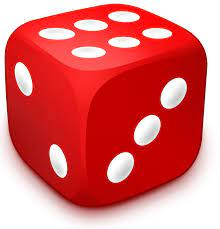

<u>Example</u>  
A fair six-sided die is thrown once.  
* What is the probability of getting a "1"?  
* What is the probability of throwing an even number?  
* What is the probability of getting a number in the set {1, 2, 3, 4, 5, 6}?

## Probability: Example

Two games of chance:
1. Bet on: at least one six when throwing a fair die 4 consecutive times.

    - You will win in the long run when playing this game.

2. Bet on: at least one “double six” when throwing two fair dice 24times.

    - You will lose in the long run when playing this game, even though in some sense the two bets seem equivalent. (Probability divided by six but number of throws multiplied by six.)

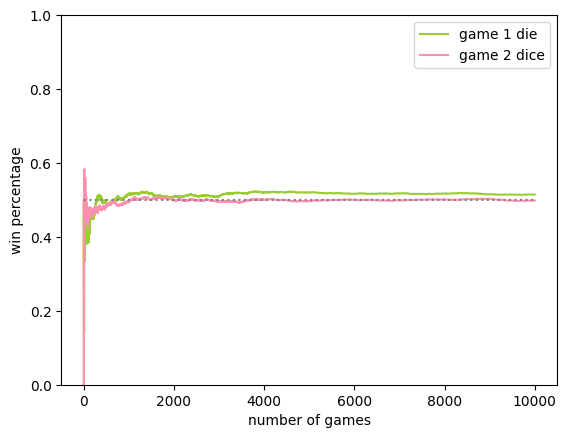

In [3]:
import random

number_of_games = 10000

number_of_times_won = 0
l_game_1 = []
for index in range(1, number_of_games + 1):
  number_of_times_6 = 0
  for _ in range(4):
    number_of_times_6 += 1 if random.randint(1,6) == 6 else 0
  number_of_times_won += 1 if number_of_times_6 >= 1 else 0
  l_game_1.append(number_of_times_won / index)

number_of_times_won = 0
l_game_2 = []
for index in range(1, number_of_games + 1):
  number_of_times_double_6 = 0
  for _ in range(24):
    number_of_times_double_6 += 1 if (random.randint(1,6) == 6 and random.randint(1,6) == 6) else 0
  number_of_times_won += 1 if number_of_times_double_6 >= 1 else 0
  l_game_2.append(number_of_times_won / index)

data = {'number of games': range(1,number_of_games + 1), 'game 1 die': l_game_1, 'game 2 dice': l_game_2}

f, ax = plt.subplots(1, 1);

sns.lineplot(ax=ax, x='number of games', y='game 1 die', data=data, color = "yellowgreen", label="game 1 die");
sns.lineplot(ax=ax, x='number of games', y='game 2 dice', data=data, color = bakermiller, label="game 2 dice");
sns.lineplot(ax=ax, x='number of games', y=0.5, data=data, color = "grey", linestyle='dotted');

plt.xlabel('number of games');
plt.ylabel('win percentage');
plt.ylim((0,1));
plt.legend()



## Two (or more) events

There are many contexts in which you are interested in the outcome of more than one thing at a time - that is, of a **compound event**. In simple cases it may be possible to make a list of all the possible outcomes. In order to make it easier to keep track, it is common to write the outcoumes as ordered pairs inside brackets, (), and to put the whole list inside curly brackets, {}. This list is called the **sample space** or **universe** of the experiment.

It helps to write a sample space list in a logical, methodical order.   
* For tossing a coin two times the sample space can be written as:  
{(H, H), (H, T), (T, H), (T, T)}  
* For tossing a coin three times the sample space can be written as:   
{(H, H, H), (H, T, H), (T, H, H), (T, T, H), (H, H, T), (H, T, T), (T, H, T), (T, T, T)}  

Within the sample space, the list for tossing a coin twice appears two times.  
This list of eight outcomes for tossing a coin three times can then form the basis of the sixteen outcomes for tossing a coin four times. This is created by putting an extra 'H' at the end and then an extra 'T' at the end. It can in turn be used for the list of tossing a coin five times, and so on.

<u>Example</u>  
What is the probability of at least one six when throwing a fair die 4 consecutive times.

*   What is the universe for the first game?  
𝛺 = {(1, 1, 1, 1), (1, 1, 1, 2), (1, 1, 1, 3), … , (6, 6, 6, 4), (6, 6, 6, 5), (6, 6, 6, 6)}
*   What set corresponds to the event "at least one 6"?  
𝐴 = {(6, 1, 1, 1), (6, 1, 1, 2), … , (5, 5, 5, 6), (6, 6, 1, 1), … (6, 6, 5, 5), (1, 6, 6, 1), … , (6, 6, 6, 6)}







## Axioms of Probability

1. Probabilities are non-negative: $𝑃(𝐴) ≥ 0$ for each $𝐴$.
2. The universe has probability 1: $𝑃(𝛺) = 1$.
3. When $𝐴$ and $𝐵$ are disjoint events (i.e. $𝐴 ∩ 𝐵 = ∅$) then it holds that  
$𝑃(𝐴 ∪ 𝐵) = 𝑃(𝐴) + 𝑃(𝐵)$.  
This is called the **sum rule**.

### Properties of Probabilities

From the three axioms of probability, we can derive all properties of probabilities. Some important ones are listed below:

1. Complement rule: for each $𝐴$ it holds that

    $𝑃(\overline{A}) = 1 − 𝑃(𝐴)$

    where $\overline{A}$ represents the event "A does not occur".

2. The impossible event has probability zero: $𝑃(∅) = 0$.

3. The general sum rule:

    $𝑃(𝐴 ∪ 𝐵) = 𝑃(𝐴) + 𝑃(𝐵) − 𝑃(𝐴 ∩ 𝐵)$

The general sum rule says that the probability of A or B can be found by adding the probabilities of A and B and then subtracting what has been double counted.  
You can check this works in simple examples like events based on throwing a die, but logic says it is always going to be true, even in situations where events are not equally likely or when you cannot list all possible outcomes.

### Example

If _A_ is the event a fair die shows a factor of 6 and _B_ is the event that the fair die shows a square number, then 1, 2, 3 and 6 satisfy _A_, while 1 and 4 satisfy _B_. _A_ and _B_ is satisfied by 1, and _A_ or _B_ is satisfied by 1, 2, 3, 4 and 6.

- 𝑃(𝐴 ∪ 𝐵) = $\cfrac{5}{6}$  
- 𝑃(𝐴) = $\cfrac{4}{6}$  
- 𝑃(B) = $\cfrac{2}{6}$  
- 𝑃(𝐴 ∩ 𝐵) = $\cfrac{1}{6}$  
- $\cfrac{5}{6} = \cfrac{4}{6} + \cfrac{2}{6} - \cfrac{1}{6}$

### Exercise

A coin is tampered with such that 𝑃(head) = 0.6. What is 𝑃(tail)?

$\mathcal P(\text{tail})=0.4$

### Exercise

From the 250 students enrolled in this course, 200 own a PlayStation game console, while 100 own a Nintendo Switch. There are 75
students who own both game consoles. What is the probability, when you pick a random student, that

* this student does not own a PlayStation 
* this student owns a PlayStation or a Nintendo Switch (or both)
* this student owns neither a PlayStation nor a Nintendo Switch.


$X$ = owning a playstation
$Y$ = owning a Nintendo switch

* this student does not own a PlayStation = $\mathcal P(\overline X)$
                                        $$= 1 - \mathcal P(X)\\
                                        = 1 - \frac{200}{250}\\
                                        = \frac{5}{5} - \frac{4}{5}\\
                                        = \frac{1}{5}$$
* this student onws a Playstation or a Nintendo Switch (or both) = $\mathcal P(X \cup Y)$
  $$
  = \mathcal P(X) + \mathcal P(Y) - \mathcal P(XY)\\
  = \frac{200}{250} + \frac{100}{250} - \frac{75}{250}\\
  = \frac{8 + 4 - 3}{10}\\
  = \frac{9}{10}
  $$

* this student owns neither a PlayStation nor a Nintendo Switch = $\mathcal P(\overline{X \cup Y})$
  $$
  = 1 - \mathcal P(X \cup Y)\\
  = \frac{10}{10} - \frac{9}{10}\\
  = \frac{1}{10}
  $$

## Independent Events

### Example

When events are independent it means that the occurrence of one event (or knowing that the event occurred) does not change the probability of the other event occurring. As an example: draw a card from a standard deck of cards and consider the following events:  

- 𝐴 = a ♣ was drawn

- 𝐵 = an ace was drawn  

When I tell you that 𝐵 occurred, this will not change your opinion about the probability of 𝐴 occurring, this will still be 13/52 = 1/4.

(Note: this also works the other way around!)

### Mathematically

Two events 𝐴 and 𝐵 are **independent** when

$$𝑃(𝐴 ∩ 𝐵) = 𝑃(𝐴)𝑃(𝐵)$$

## Dependent events

### Example

Consider the events from before where students own either a PlayStation, a Nintendo Switch or both. Let 𝐴 be the event that a student owns a PlayStation, while 𝐵 represents the fact that a student owns a Nintendo Switch. From the numbers above we see that

- $P(A) = \frac{200}{250} = 0.8$ and
- $P(B) = \frac{100}{250} = 0.4$

when we multiply these two probabilities we get

$$P(A)P(B) = 0.8 * 0.4 = 0.32$$

However, the probability that a student owns both a PlayStation and a Nintendo Switch, i.e. 𝐴 ∩ 𝐵 is given by

$$P(A \cap B) = \cfrac{75}{250} = 0.3 \neq 0.32$$

Hence, $P(A \cap B) \neq P(A)P(B)$ and the two events are **dependent**.

In practical terms this means that e.g. knowing that a student owns a PlayStation gives you additional information about their ownership of a Nintendo Switch. Before you know that the student owns a PlayStation the probability that this student owns a Nintendo Switch is  

$$P(B) = \frac{100}{250} = 0.4$$

However, once you know that that the student owns a PlayStation you know that this students belongs to the group of 200 PlayStation owners, of which 75 also own a Nintendo Switch. With fancy notation we write this as

$$P(B|A) = \frac{75}{200} = 0.375$$

So the probability now is slightly lower.

On the other hand, when you know that a student owns a Nintendo Switch, what is the probability of this student owning a PlayStation?

$$P(A|B) = \frac{75}{100} = 0.75$$

### Exercise

The results of a survey of colours and types of cars are shown in the table.  

|       | Saloon | Hatchback |
|:------| :----: | :-------: |
|Silver |  65    |     59    |
|Black  |  27    |     22    |
|Other  |  16    |     19    |

One car is selected from the group at random. Find the probability that the selected car is

* a silver hatchback
* a hatchback
* a hatchback, given that it is silver

$A$ = car is silver
$B$ = car is hatchback
$C$ = car is black
$D$ = car is other color
total amount of cars = 65 + 59 + 27 + 22 + 16 + 19 = 208

- chance of a silver hatchback = $\mathcal P(A \cup B)$
  
  Valt rechtstreeks af te leiden uit tabel: $\frac{59}{208}$
- chance of a hatchback = $\mathcal P(B)$
  
  $\frac{59 + 22 + 19}{208}$
- chance of a hatchback, given that it's silver = $\mathcal P(B|A)$
  
  $\frac{59}{124}$

### Exercise

A golfer enters two tournaments. He estimates the probability that he wins the first tournament is 0.6, that he wins the second tournament is 0.4 and that he wins both tournaments is 0.35.

* Find the probability that he does not win either tournament
* Show, by calculation, that winning the first tournament and winning the second tournament are not independent events.
* The tournaments are played in successive weeks. Explain why it would be surprising if these were independent events.

Given:
- $A$ = he wins the first tournament
- $B$ = he wins the second tournament
- $\mathcal P(A \cap B) = 0.35$
- $\mathcal P(A) = 0.6$
- $\mathcal P(B) = 0.4$

Asked: $\mathcal P(\overline A \cap \overline B)$

Solution:
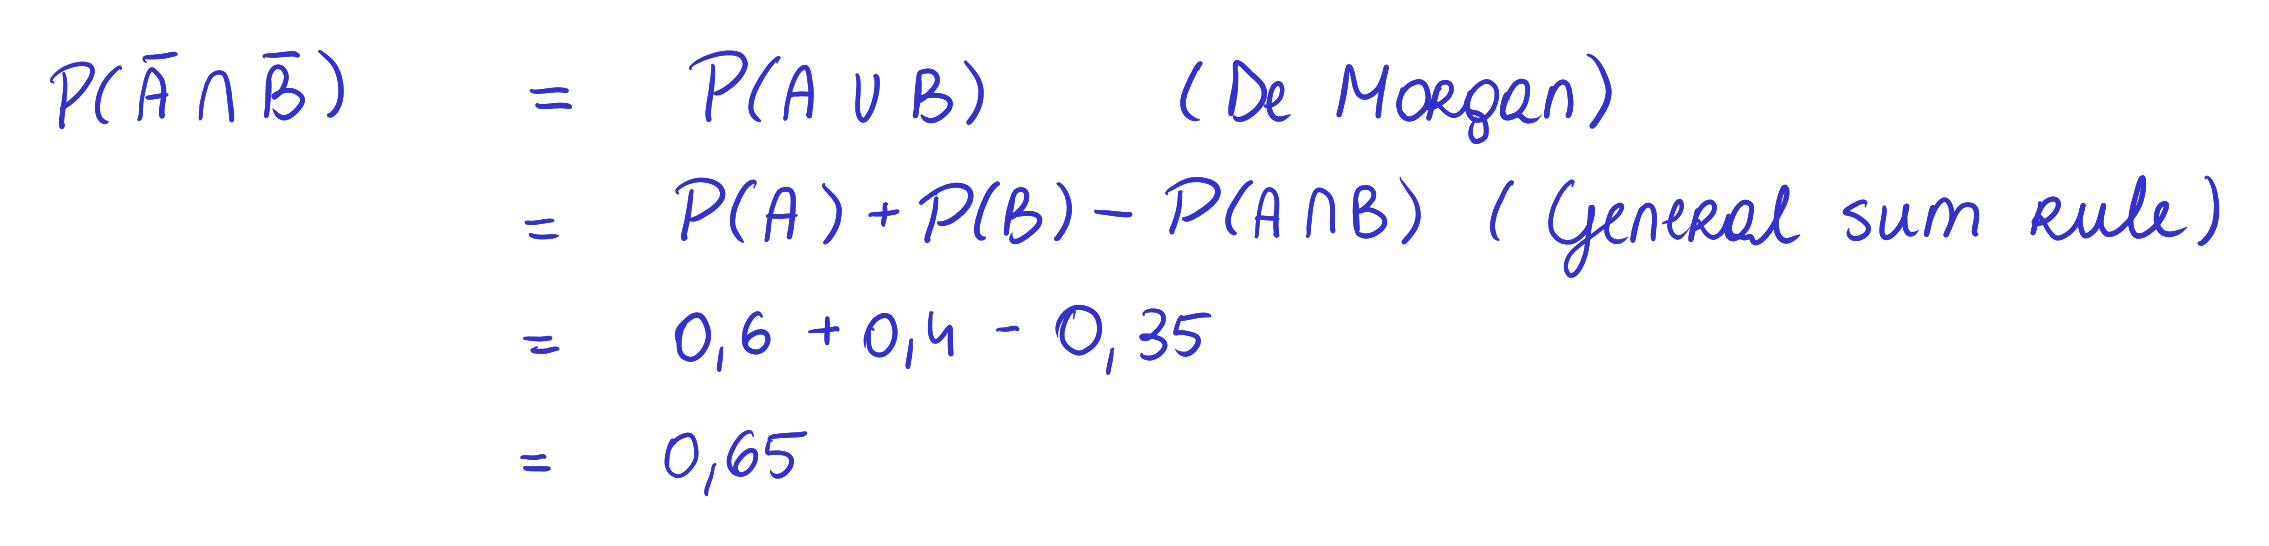

Asked: show that winning first and second tournament are not independent events by caluclation:
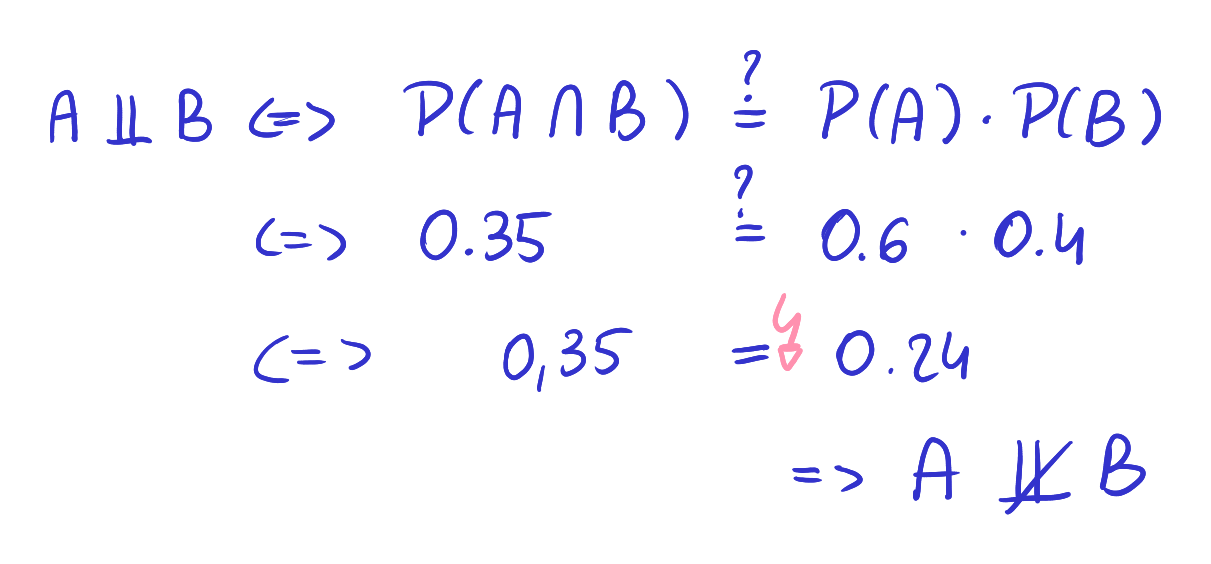

It would be suprising if these were independent events since the golfer will probably have used some strength and stress resistance for the first tournament that they won't have anymore of the second.

### Exercise

Of the students who took English in a certain school one year, 60% of them took History, 30% of them took Biology, and 10% took History and Biology. One of the students taking English is chosen at random.

* Find the probability that the student took neither History nor Biology
* Given that the student took exactly one of History and Biology, find the probability it was History

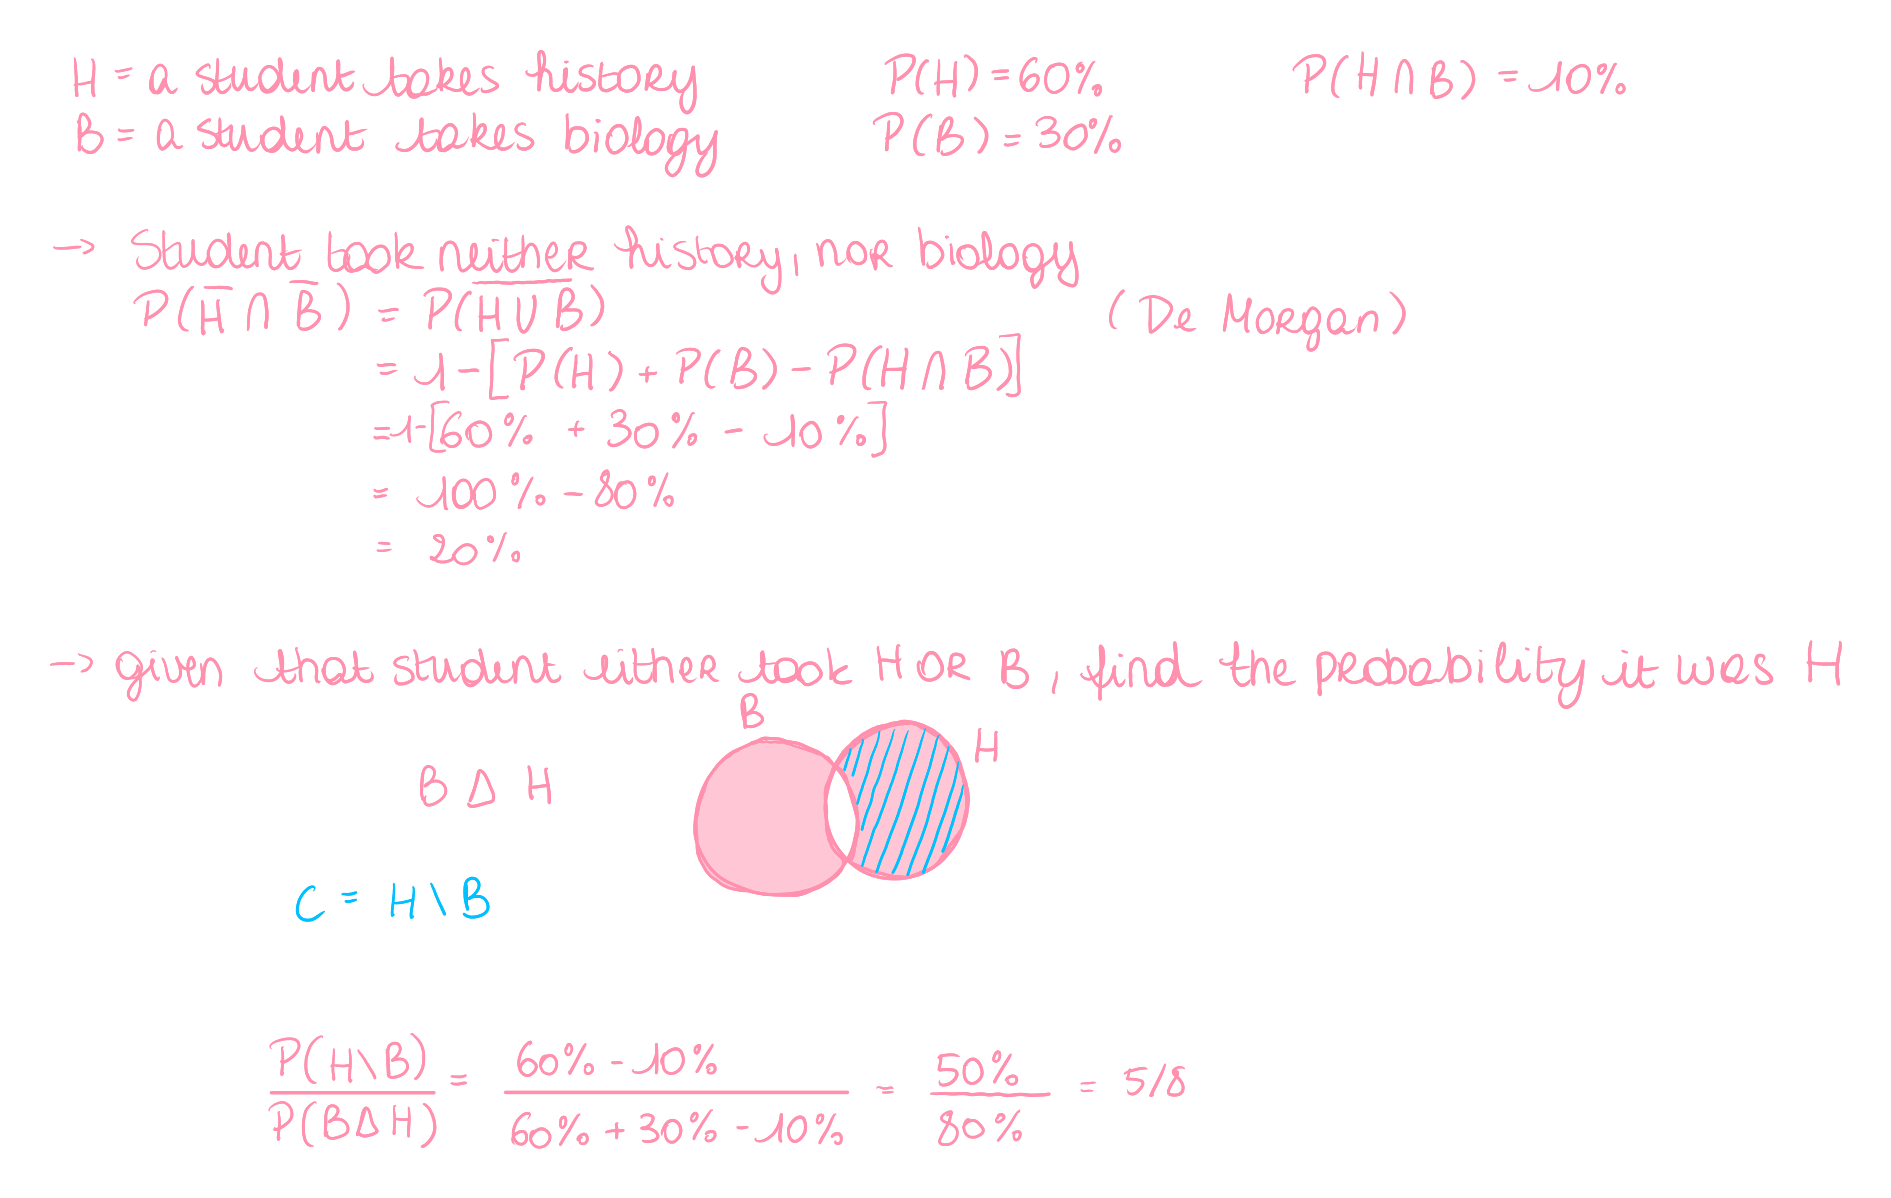

### Exercise

Data about age of males and females in a small rural area are shown in the table.  

|       | Under 35 | 35 and over |
|:------| :------: | :---------: |
|Male   |    345   |     380     |
|Female |    362   |     472     |

A person from this area is chosen at random. Let _M_ be the event that the person is male and let _Y_ be the event that the person is under 35.

* Find P(_M_)
* Find P(_M_ and _Y_)
* Are _M_ and _Y_ independent events? Justify your answer.
* Given that the person chosen is under 35, find the probability that the person is female.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the data
data = {
    'Under 35': [345, 362],
    '35 and over': [380, 472]
}
# Define the row index
index = ['Male', 'Female']
# Create the DataFrame
df = pd.DataFrame(data, index=index)


In [35]:
total_amount_of_people = df['Under 35'].sum() + df['Under 35'].sum()
P_M = df.loc['Male'].sum() / total_amount_of_people
print(f"P(M) = {P_M * 100 :.2f}%")

P_M_and_Y = df['Under 35'].loc['Male'] / total_amount_of_people
print(f"P(M and Y) = {P_M_and_Y * 100 :.2f}%")

P_Y = df['Under 35'].sum() / total_amount_of_people
P_M_times_P_Y = P_M * P_Y

print(f"P(P and Y) is {P_M_and_Y*100:.2f}% and P(M)*P(Y) is {P_M_times_P_Y*100:.2f}%")
print(f"So, M and Y are {["not ", ""][int(P_M_times_P_Y == P_M_and_Y)]}independent events.")
 


P(M) = 51.27%
P(M and Y) = 24.40%
P(P and Y) is 24.40% and P(M)*P(Y) is 25.64%
So, M and Y are not independent events.


## Discrete random variable

### Example

A player draws a card from a standard deck of cards. They get 1 € when drawing a jack, 2 € when drawing a queen and 3 € when drawing a king. In all other cases they receive nothing.

We can formalise this be defining a mapping $X$ from $\Omega$ to $\mathbb{R}$:

$
\begin{equation}
    X : \Omega \rightarrow \mathbb{R} : \omega \mapsto X(\omega) =
    \begin{cases}
        1 & \textsf{when drawing a jack}\\
        2 & \textsf{when drawing a queen}\\
        3 & \textsf{when drawing a king}\\
        0 & \textsf{in all other cases}\\
    \end{cases}
\end{equation}
$

We have done nothing else but associate a number with different events.

### Probability mass function

Using the rules of probability we can assign probabilities to the different numerical outcomes

$$
f_{X}(3) = P(X = 3) = P(king) = \frac{4}{52} = \frac{1}{13}\\
f_{X}(2) = P(X = 2) = P(queen) = \frac{4}{52} = \frac{1}{13}\\
f_{X}(1) = P(X = 1) = P(jack) = \frac{4}{52} = \frac{1}{13}\\
f_{X}(0) = P(X = 0) = P(any~other~card) = \frac{40}{52} = \frac{10}{13}\\
$$

Note:

* It holds that $f_{X}(0) + f_{X}(1) + f_{X}(2) + f_{X}(3) = 1$
* And also: $0 \leq f_{X}(x_{i}) \leq 1$

A random variable is a quantity that has its value determined by the outcome of a random event. Random variables can arise from **probability experiments**. For example, when you throw two dice, the sum of the scores _X_ is a random variable. Similarly, the product of the scores _Y_ and the larger of the scores _Z_ are also random variables.

Random variables can arise from real-life observation. For example the number of telephone calls _X_ arriving at a switchboard between 10 and 10.30 am.

When values of a variable have a probability attached, they form a **probability distribution**.

$X$ is a **discrete random variable** if $X$ takes values $x_1, x_2, x_2, \ldots$ and $P(X = x_i) = p_i$ where all $p_i \geq 0$ and $\sum p_i = 1$   

Note that this means $X$ can only take distinct values, all probabilities of $X$ must be non-negative and their sum is 1.

To make things more explicit we can put the probability distribution into a table:

x  | 0 | 1 | 2 | 3
---|---|---|---|---
$f_{x}(x)$ = P(X = x) | $\cfrac{10}{13}$ |  $\cfrac{1}{13}$ |  $\cfrac{1}{13}$ |  $\cfrac{1}{13}$


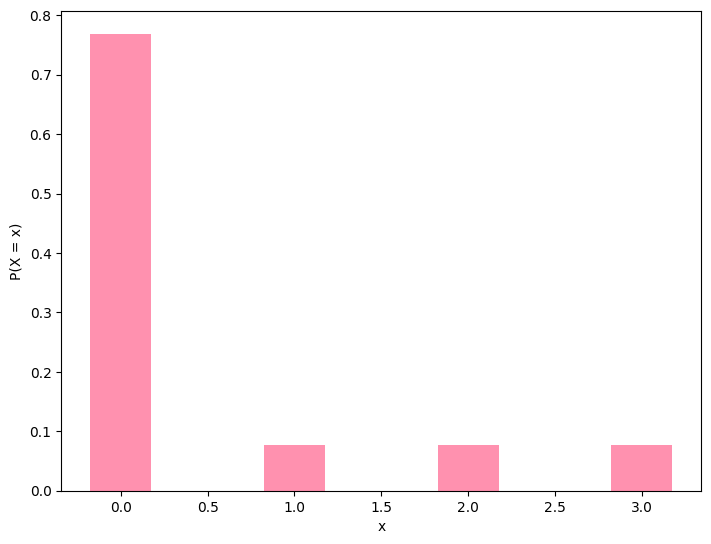

In [37]:
x = np.arange(4)
y = [10/13, 1/13, 1/13, 1/13]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x, y, 0.35, color=bakermiller)
ax.set_xlabel('x')
ax.set_ylabel('P(X = x)')
plt.show()

### Exercise - probability distribution of rolling 1 die

What is the probability of each outcome when rolling a single die?

x  | 1 | 2 | 3 | 4 | 5 | 6
---|---|---|---|---|---|---
$f_{x}(x)$ = P(X = x) | $\cfrac{1}{6}$ |  $\cfrac{1}{6}$ |  $\cfrac{1}{6}$ |  $\cfrac{1}{6}$ | $\cfrac{1}{6}$ | $\cfrac{1}{6}$


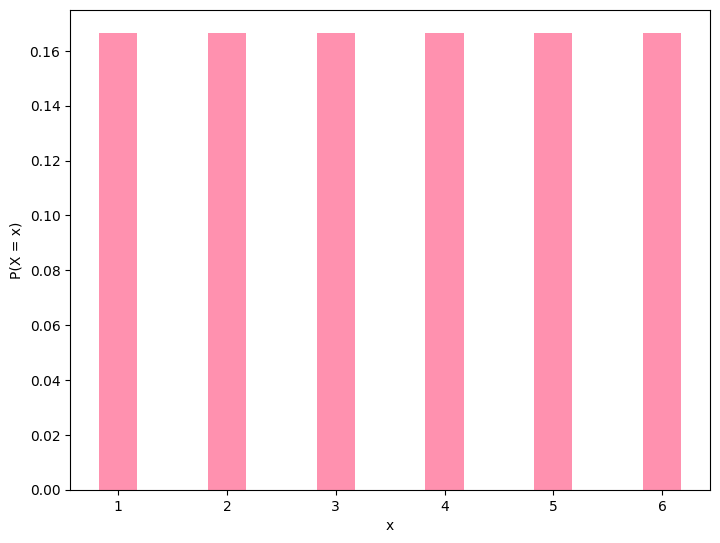

In [38]:
x = np.arange(1, 7)
y = np.full(6, 1/6)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x, y, 0.35, color=bakermiller)
ax.set_xlabel('x')
ax.set_ylabel('P(X = x)')
plt.show()

### Exercise - probability distribution of rolling 2 dice

What is the probability of each outcome when rolling 2 dice?

| x  | 2  |  3 |  4 |  5 |  6 | 7  |  8 | 9  | 10  | 11  |  12 |
|---|---|---|---|---|---|---|---|---|---|---|---|
| $f_{x}(x)$ = P(X = x)  | $\cfrac{1}{36}$  |  $\cfrac{2}{36}$ | $\cfrac{3}{36}$  | $\cfrac{4}{36}$  |  $\cfrac{5}{36}$ | $\cfrac{6}{36}$  |  $\cfrac{5}{36}$ | $\cfrac{4}{36}$  | $\cfrac{3}{36}$  |  $\cfrac{2}{36}$ |  $\cfrac{1}{36}$ |


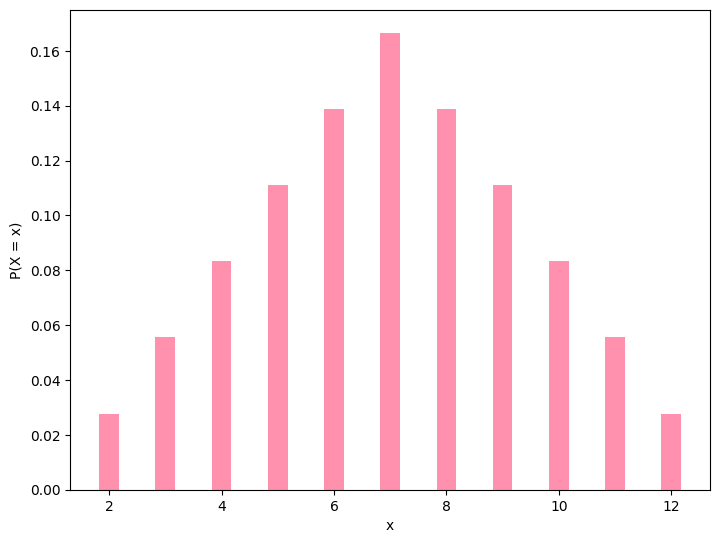

In [39]:
x = np.arange(2, 13)
y = [1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x, y, 0.35, color=bakermiller)
ax.set_xlabel('x')
ax.set_ylabel('P(X = x)')
plt.show()

### Exercise

Find which of the following are discrete random variables, giving a reason for any which are not.


Variables are discrete random variables if probability function
- accumulates to one
- is non negative

In [60]:
def check_probability_function(list_of_probabilities):
    sum = 0
    for elem in list_of_probabilities:
        if elem < 0:
            print(f"Found negative probability: {elem}.")
            return
        sum += elem
    if round(sum, 10) == 1:
        print(f"Probability mass function is valid.")
    else:
        print(f"Total of probabilities isn't equal to 1: {sum}.")



1.

x  | 1 | 2 | 3 | 4 | 5
---|---|---|---|---|---
P(X = x) | $\cfrac{2}{10}$ |  $\cfrac{3}{10}$ |  $\cfrac{4}{10}$ |  $\cfrac{3}{10}$ |  $\cfrac{2}{10}$



In [58]:
check_probability_function([2/10, 3/10, 4/10, 3/10, 2/10])

Total of probabilities isn't equal to 1: 1.4





2.

x  | -2 | -1 | 0 | 1 | 2
---|---|---|---|---|---
P(X = x) | $\cfrac{2}{10}$ |  $\cfrac{3}{10}$ |  $\cfrac{1}{10}$ |  $\cfrac{3}{10}$ |  $\cfrac{1}{10}$



In [59]:
check_probability_function([2/10, 3/10, 1/10, 3/10, 1/10])

Probability mass function is valid.




3.

x  | 5 | 4 | 10 | 15 | 20
---|---|---|---|---|---
P(X = x) | $\cfrac{1}{2}$ |  $\cfrac{1}{4}$ |  $\cfrac{1}{8}$ |  $\cfrac{1}{16}$ |  $\cfrac{1}{16}$



In [61]:
check_probability_function([1/2, 1/4, 1/8, 1/16, 1/16])

Probability mass function is valid.




4.

x  | 1 | 2 | 3 | 4 | 5
---|---|---|---|---|---
P(X = x) | $\cfrac{2}{10}$ |  $\cfrac{3}{10}$ |  $\cfrac{4}{10}$ |  $\cfrac{3}{10}$ |  $\cfrac{-2}{10}$



In [62]:
check_probability_function([2/10, 3/10, 4/10, 3/10, -2/10])

Found negative probability: -0.2.




### Exercise

A fair die is thrown. List the probability distribution for the following random variables:  

1. _X_ = score on the die  
2. _Y_ = 2 * score on the die  
3. _Z_ = square of the score on the die  
4. _W_ =
$
\begin{cases}
0 & \text{if the score on the die is a factor of 6}\\   
1 & \text{otherwise}\\    
\end{cases}
$

|$x$|1|2|3|4|5|6|7|8|9|10|11|12|
|-|-|-|-|-|-|-|-|-|-|-|-|-|
|$\mathcal P(X=x)$|$\cfrac{1}{6}$|$\cfrac{1}{6}$|$\cfrac{1}{6}$|$\cfrac{1}{6}$|$\cfrac{1}{6}$|$\cfrac{1}{6}$|0|0|0|0|0|0|
|$\mathcal P(Y=2x)$|0|$\cfrac{1}{6}$|0|$\cfrac{1}{6}$|0|$\cfrac{1}{6}$|0|$\cfrac{1}{6}$|0|$\cfrac{1}{6}$|0|$\cfrac{1}{6}$|


## Using the Probability Mass Function

Once you have a probability mass function, you can compute other probabilities. With the card game, what is the probability that you gain at most 2 EUR?

$P(X \leq 2) = P(X=0) + P(X=1) + P(X=2) = \frac{10}{13} + \frac{1}{13} + \frac{1}{13} = \frac{12}{13}$

We could also have used the complement rule in this case:

$P(X \leq 2) = 1 - P(X > 2) = 1 - P(X = 3) = 1 - \frac{1}{13} = \frac{12}{13}.$

### Exercise

When throwing two dice, what is the probability that the sum of the results is between 4 and 7, boundaries included?

$P(4 \leq X \leq 7) = P(X=4) + P(X=5) + P(X=6) +  P(X=7) = \frac{18}{36} = \frac{1}{2}$

We could also compute this using left-tail probabilities only:

$P(4 \leq X \leq 7) = P(X \leq 7) - P(X < 4) = P(X \leq 7) - P(X \leq 3) = \frac{21}{36} - \frac{3}{36} = \frac{1}{2}$

### Exercise
a)  

x  | 1 | 2 | 3 | 4 | 5
---|---|---|---|---|---
P(X = x) | $\cfrac{2}{10}$ |  $\cfrac{1}{10}$ |  $\cfrac{3}{10}$ |  $a$ |  $\cfrac{1}{10}$

i) Find $a$.  

  $a = 1 - \cfrac{2+1+3+1}{10} = \cfrac{3}{10}$

ii) Find $P(X \geq 2)$

$\mathcal P(X \geq 2) = \mathcal P(X = 2) + \mathcal P(X = 3) + \mathcal P(X = 4) + \mathcal P(X = 5) = \frac{1+3+3+1}{10} = \cfrac{4}{5}$
  

b)  

x  | -2 | -1 | 0 | 1
---|---|---|---|---
P(X = x) | $k$ |  $2k$ |  $2k$ |  $k$

i) Find $k$.  
ii) Find $P(X \leq 0)$
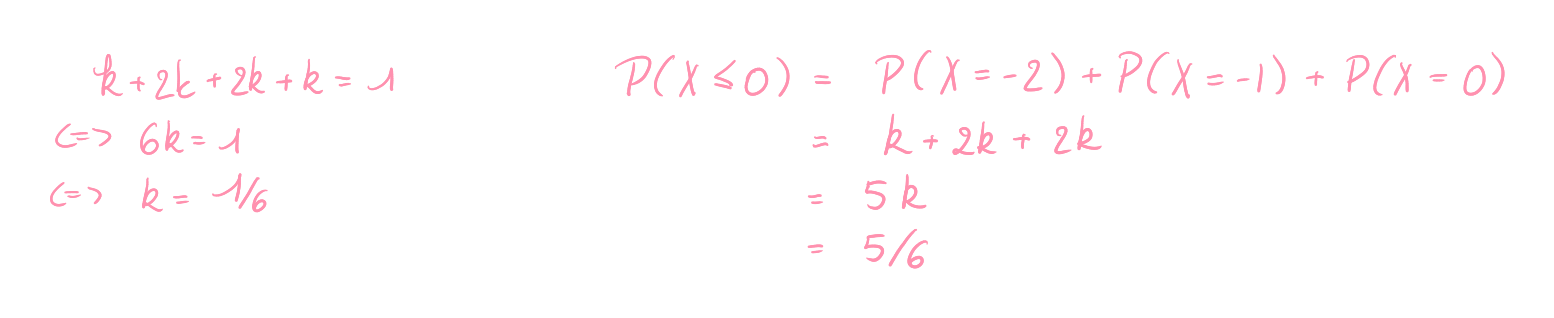

c)  

x  | 5 | 6 | 8 | 9 | 12
---|---|---|---|---|---
P(X = x) | $\cfrac{4}{10}$ |  $\cfrac{2}{10}$ |  $\cfrac{3}{10}$ |  $a$ |  $\cfrac{1}{10}$

i) Find $a$.  
ii) Find $P(X \geq 9)$

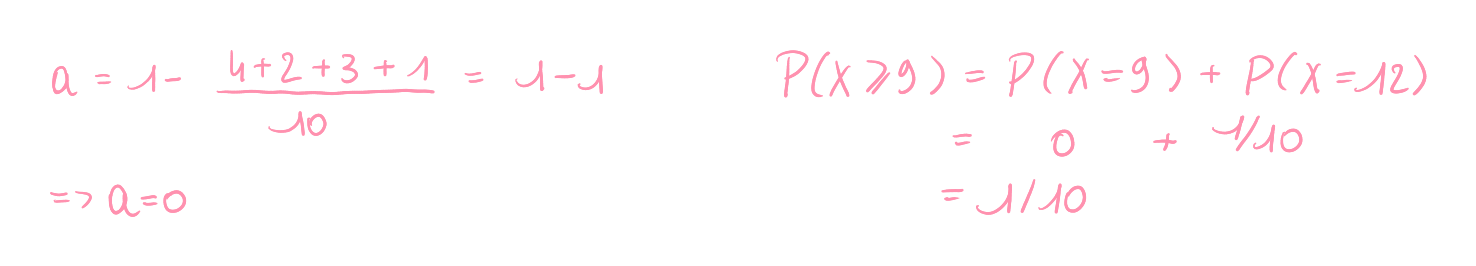


## Expectation of a discrete random variable

Consider the random variable associated with playing the card game with the following probability mass function

$
\begin{aligned}
  f_X(3) &=P(X=3) = \frac{1}{13},\quad & f_X(2) =P(X=2) = \frac{1}{13},\\
  f_X(1) &=P(X=1) = \frac{1}{13},\quad & f_X(0) =P(X=0) = \frac{10}{13}.
\end{aligned}
$

If somebody played this game  a very large number of times, what would their average earnings be?
I.e. what is the **expected value** of this random variable?

The **mean** or **expectation** of a discrete random variable is denoted by $\mu_X$ or $\text{E}(X)$ and is given by

$$\mu_X =\sum_{i} x_{i} P(X=x_{i})= \sum_{i} x_{i} f_X(x_{i})$$

Notes:

- The meaning of the formula is: we multiply each value by its probability and sum over all possible values of the random variable.
- there is a large similarity between this formula and the way you calculate the sample mean when a frequency table is given.
- we often write $\mu$ instead of $\mu_X$.

### Exercise

The expected value of the random variable associated with the card game is given by:

$
\begin{aligned}
\mu_X &=\sum_{i} x_{i} f_X(x_i) \\
      &= 0 \cdot f_X(0) + 1 \cdot f_X(1) + 2 \cdot f_X(2) + 3 \cdot f_X(3) \\
      &= 0 \cdot \frac{10}{13} + 1 \cdot \frac{1}{13} + 2 \cdot \frac{1}{13} + 3 \cdot \frac{1}{13} \\
      &=\frac{6}{13} \\
\end{aligned}
$

### Exercise

Members of a public library may borrow up to five books at any one time. The number of books borrowed by a member on each visit is a random variable, $X$, with the following probability distribution:

$X$  | 0 | 1 | 2 | 3 | 4 | 5
---|---|---|---|---|---|---
P(X = x) | $0.24$ |  $0.12$ |  $0.14$ |  $0.3$ |  $0.05$ |  $0.15$

Find the expected value of $X$.

In [73]:
number_of_books = [ _ for _ in range(0, 6)]
prob = [0.24, 0.12, 0.14, 0.3, 0.05, 0.15]
expected_value = sum([ x * y  for x,y in zip(number_of_books, prob)])
print(f"Expected value of X is {expected_value}")

Expected value of X is 2.25


## Variance of a discrete random variable

The variance of a R.V. is a measure of dispersion that resembles the sample variance very closely.

The variance of a random variable is defined by:  

$
\begin{aligned}
\sigma_X^{2} &= \sum_{i} \left(x_{i}-\mu_X\right)^2 P(X = x_i)
             &= \sum_{i} \left(x_{i}-\mu_X\right)^2 f_X(x_{i}).
\end{aligned}
$

The **standard deviation** is the positive square root of the variance.

$$\sigma_X = \sqrt{\sigma^2_X}$$

### Variance: Intuition

- The random variable $X$ represents the number of received emails per day for a first office worker. This person receives either 48 or 52 emails per day, each with a 50 percent probability.
- The random variable $Y$ represents the number of received emails of a second office worker. This second person receives no emails at all with 50 percent probability and with 50 percent chance receives 100 emails.

### Exercise

1. $Y$ is the larger score showing when two dice are thrown.

    Calculate $E(Y)$.
    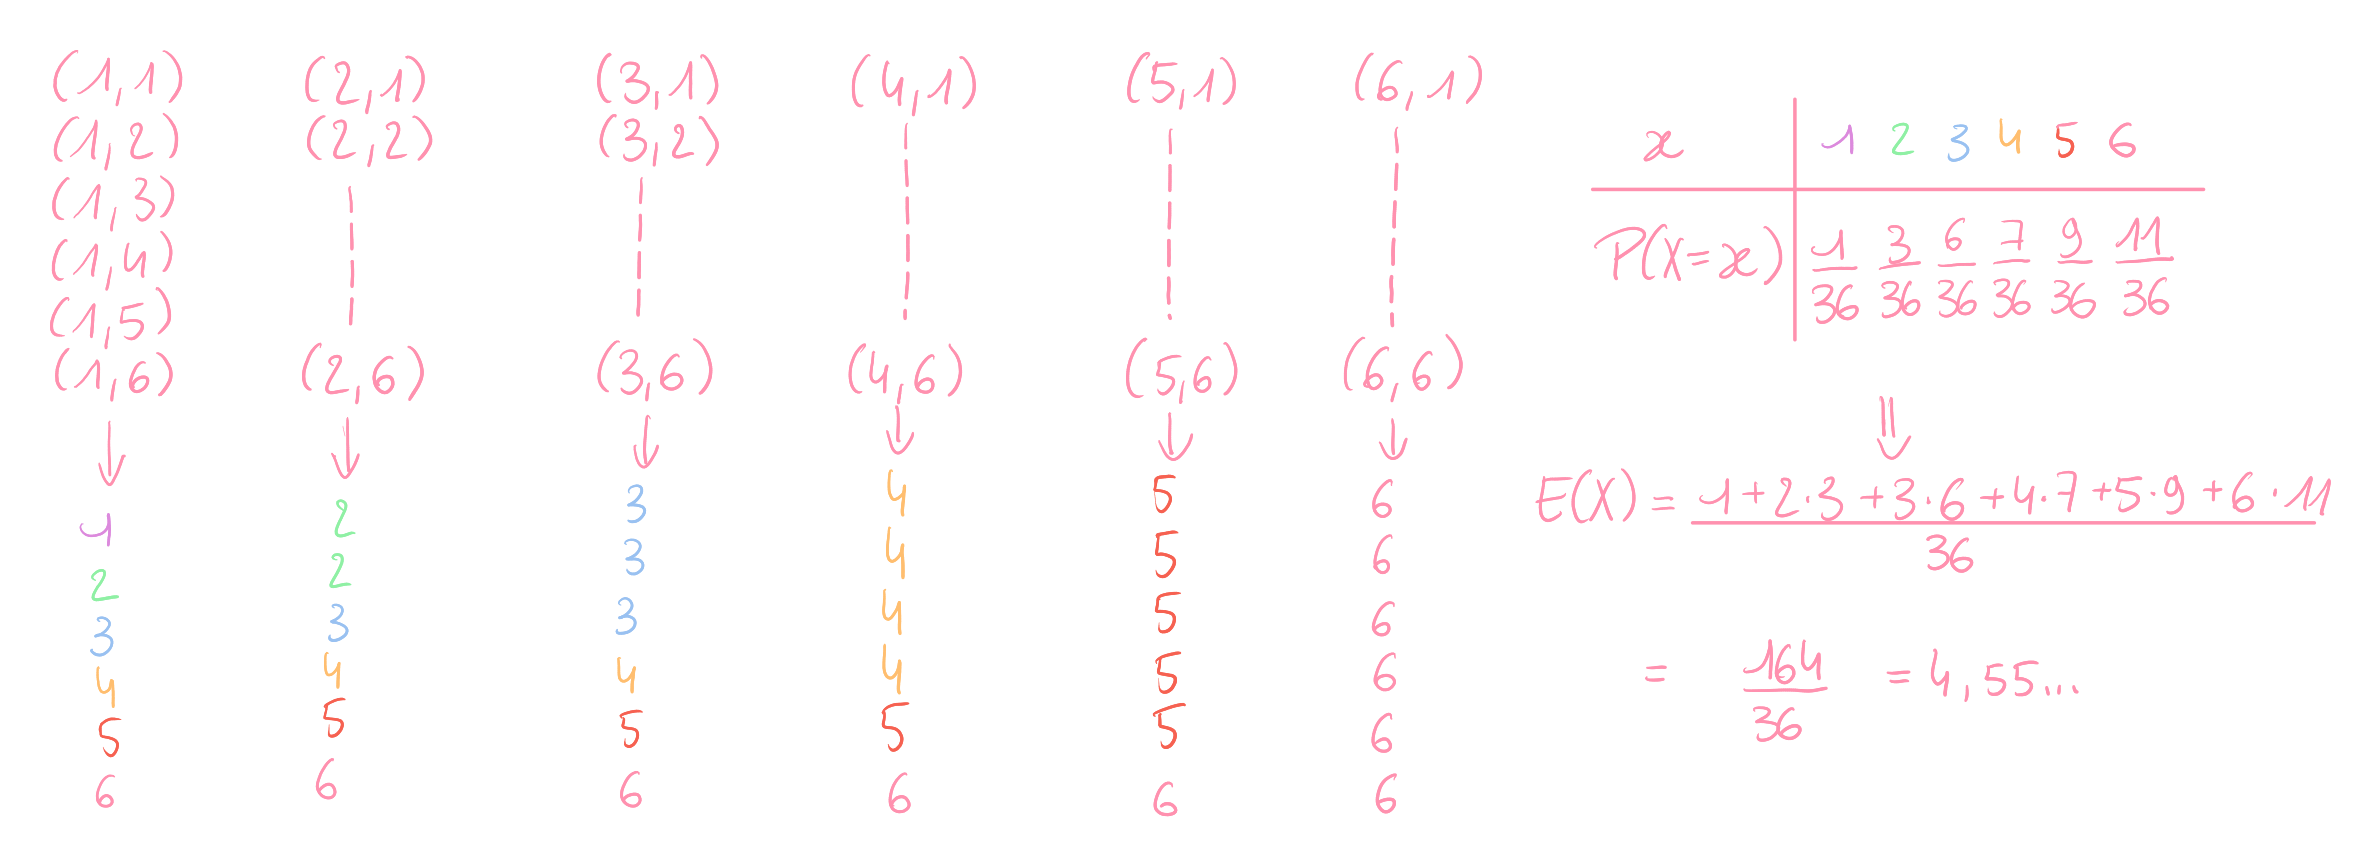

2. $Y$ is the smaller score showing when two dice are thrown.  

    Calculate $E(Y)$ and $Var(Y)$.
    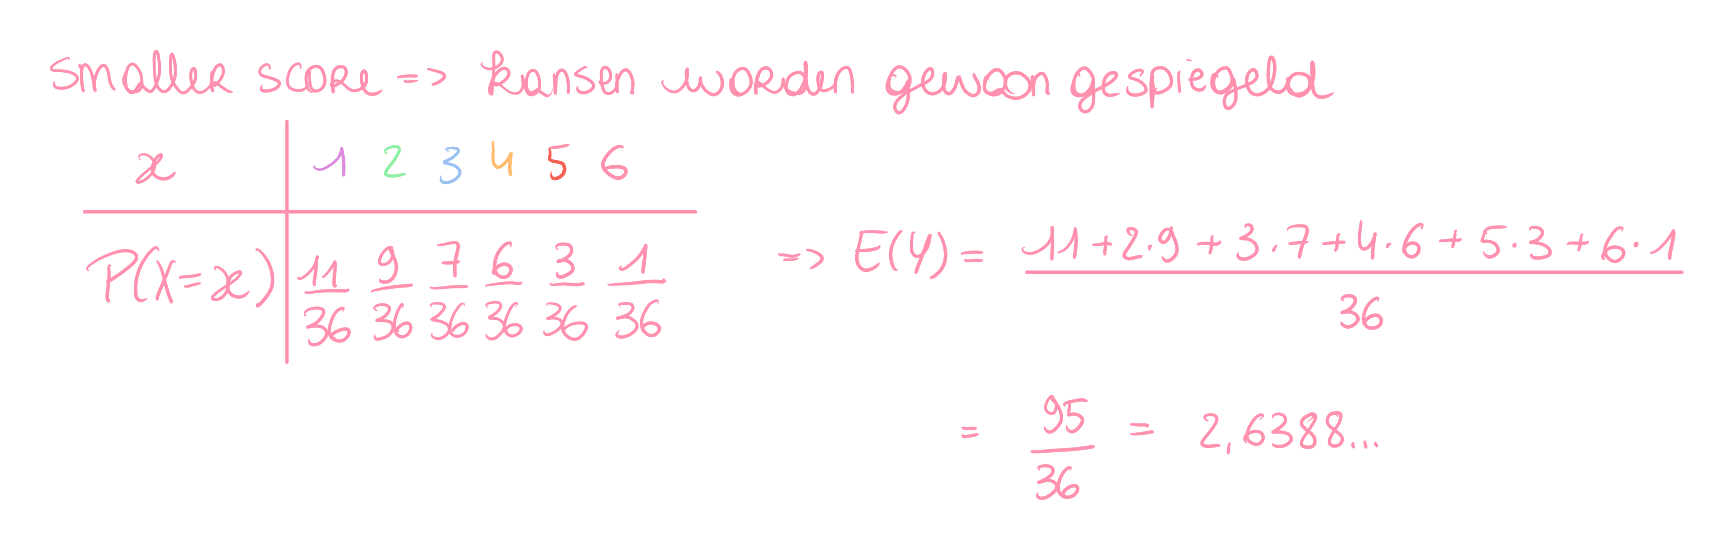

3. A regular customer in a shop observes that the number of customers, $X$, in a shop when she enters has the following probability distribution

    | No. of customers  | 0 | 1 | 2 | 3 | 4 |
    |---|---|---|---|---|---|
    |P(X = x) | $0.1$ |  $0.25$ |  $0.3$ |  $0.25$ |  $0.1$|

    - Find the mean and standard deviation of $X$.  

    The same customer also observes that the average waiting time, $Y$, before being served is as follows:

    | No. of customers  | 0 | 1 | 2 | 3 | 4 |
    |---|---|---|---|---|---|
    |Average wait (minutes) | $0$ |  $2$ |  $5$ |  $8$ |  $11$ |

    - Find the mean waiting time.  

In [ ]:
customers = [_ for _ in range(0, 5)]
prob_customers = [0.1, 0.25, 0.3, 0.25, 0.1]
wait_time = [0, 2, 5, 8, 11]

# mean
mean_cust = np.mean(customers)
print(f"Mean: {mean_cust}")

# stddev
stddev = np.std(customers)
print(f"Standard deviation: {stddev}")

# Mean waiting time
mean_wait = sum([x * y for x, y in zip(prob_customers, wait_time)]) / len(wait_time)
print(f"Mean waiting time: {mean_wait} minutes")

Mean: 2.0
Standard deviation: 1.4142135623730951
Mean waiting time: 1.02 minutes


## Continuous Random Variable

A continuous random variable takes on an uncountably infinite number of possible values.

- In this case it doesn’t make a lot of sense to consider the probability that 𝑋 equals some number 𝑎 exactly, because this probability is always zero.
- What does make sense is to consider the probability that 𝑋 takes on a value in some interval [𝑎, 𝑏].
- This probability can be found be integrating (i.e. “summing up”) the probability density function of the random variable.

### Example

The times taken by competitors in the swiming section of a triathlon are shown in the following histograms, with smaller and smaller intervals:

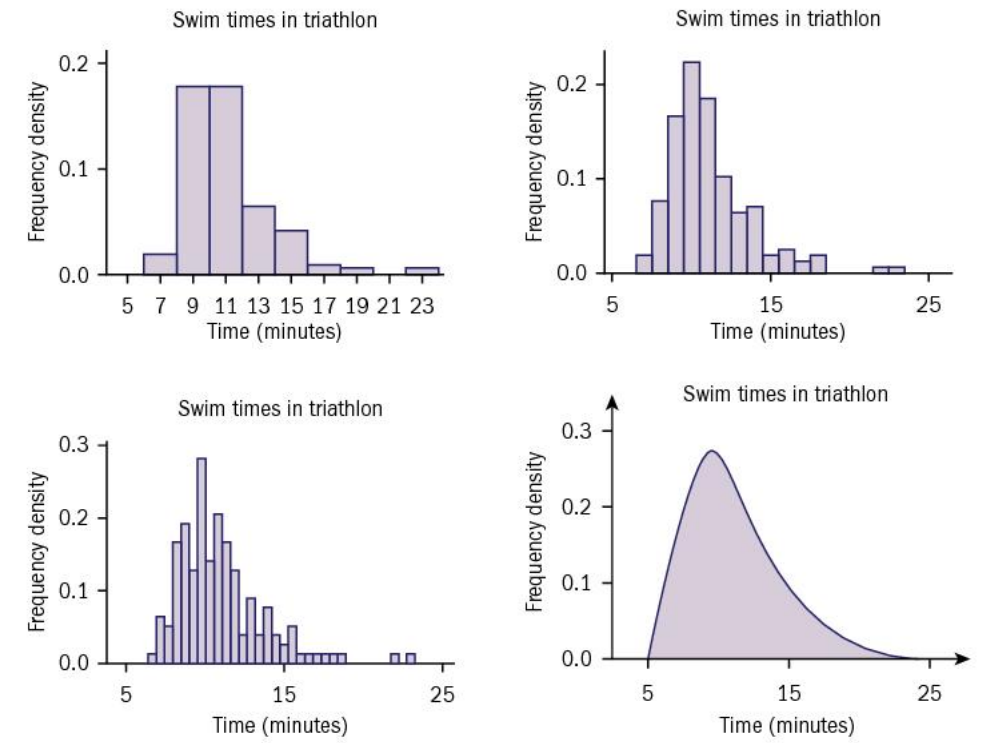

As the number of intervals increases (in the first three graphs), the data show jagged edges. This is a representation of a finite number of observations - and if another set of observations was made, you would expect to see something broadly similar but the detail is unlikely to be exactly the same. The fourth graph looks like a plausible description of the distribution of times for the swim section of the triathlon in that competition.

On a different day, if the weather is different, with different competitors, or on a different course the distribution might be different.

These histograms are drawn as **frequency density** diagrams, so the total area of all the bars is always 1. The limit of the cases where smaller and smaller intervals are taken, but the total area stays at 1, is what is meant by a **continuous random variable**. The probabilities are defined as the area under the curve between two values of $x$. Measurements of length, time, … are examples of continuous random variables.

- A continuous random variable takes on an uncountably infinite number of possible values.
- In this case it doesn’t make a lot of sense to consider the probability that 𝑋 equals some number 𝑎 exactly, because this probability is always zero.
- What does make sense is to consider the probability that 𝑋 takes on a value in some interval [𝑎, 𝑏].
- This probability can be found be integrating (i.e. “summing up”) the probability density function of the random variable.


## Expectation and Variance of a Continuous Random Variable

As there are formulas for expectation and variance for discrete random variables, there are also formulas for expectation and variance for continuous random variables.
The expectation is given by

$$\mu_X= \int_{-\infty}^{+\infty}x\, f_X(x)\,\mathrm{d}x,$$

while the variance $\sigma^2_X$ is given by

$$\sigma^{2}_X= \int_{-\infty}^{+\infty}\left(x-\mu_X\right)^2 f_X(x)\,\mathrm{d}x$$

These are essentially the same formulas as for discrete R.V.'s but with integrals instead of summations.  

[You are **not** expected to know how to calculate integrals!]

## Continuous probability distributions and the normal distribution

The **normal distribution** frequently occurs in the real world. For example, the heights, weights, of people often follow an approximate normal distribution.



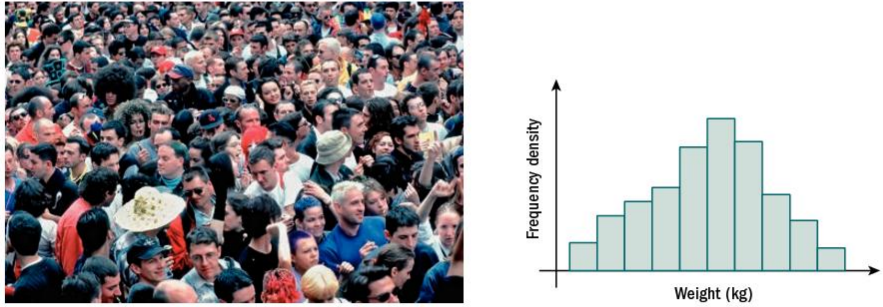

The dimensions of manifactured articles will often follow a normal distribution as well.

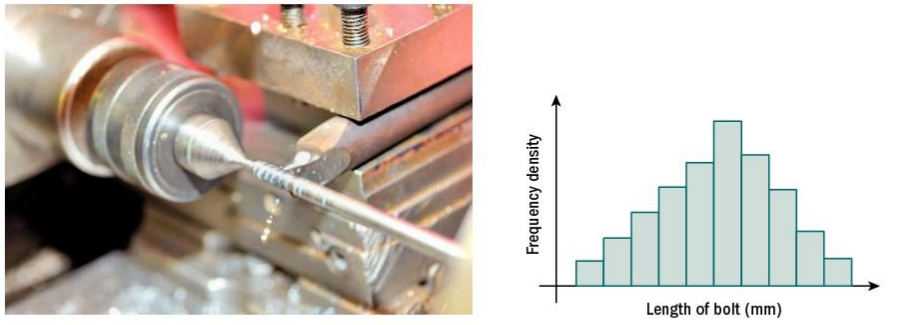

The normal distribution is a type of **continuous probability distribtuion**. This means that:
- It relates to a continous variable (height, weight, etc.).
- It describes the **probability** of this variable taking a particular range of values.

Generall the normal distribution looks like this:

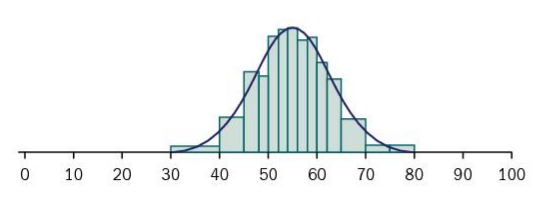


The idealised normal distribtuion has the following properties:

- It is symmetric.
- It is infinite in both directions.
- It has a single peak at the centre.
- It is continuous.
- 95% of values lie within approximately 2 **standard deviations** of the **mean**.
- 99% lie within approximately 3 standard deviations of the mean.

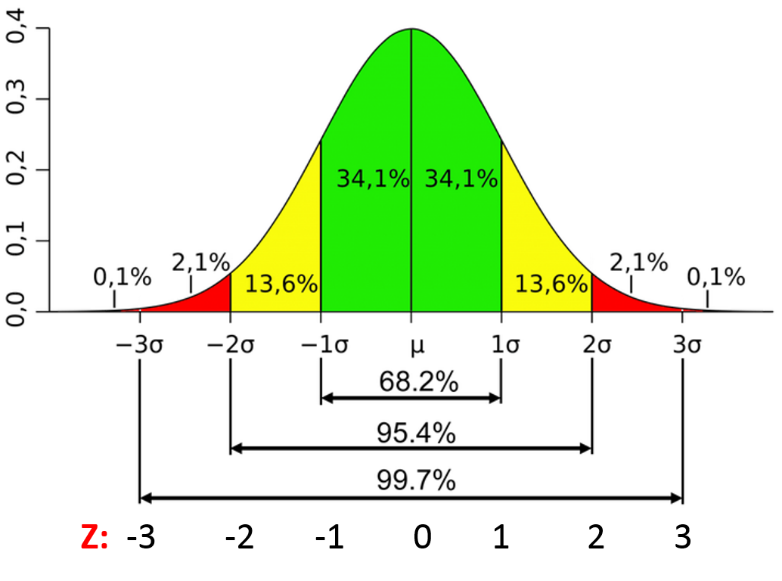


In practice, real-life variables usually do not match all these conditions perfectly and the situations will only approximate the normal distribution. For example, height and weight cannot take negative values, however a zero value may occur a long way out towards the tail of the distribution, as in the previous diagram, where the left hand end of the graph is already invisible at 20. If the value were not towards the tail, the the normal distribution would not be a reasonable approximation to use in that situation. 

### Standardised scores

The normal distribution allows us to make comparisons between individuals in a particular **normal population**. However, it becomes harder with different normal populations, for example we use different criteria to judge a 'tall man' than we use for a 'tall woman'.  

### Python functions

`import scipy.stats`

For a normal distribution with mean m and standard deviation s:

| Function                        | Purpose                         |
| :---                            | :---                            |
| `norm.pdf(x, loc=m, scale=s)`   | Probability density at $x$      |
| `norm.cdf(x, loc=m, scale=s)`   | Left-tail probability 𝑃(𝑋 < x)  |
| `norm.sf(x, loc=m, scale=s)`    | Right-tail probability 𝑃(𝑋 > x) |
| `norm.isf(1-p, loc=m, scale=s)` | p% of observations are expected to be lower than result    |

Since the normal distribution is continuous the probability of particular values is zero, so it does not make any difference whether the inequality is strict or not. 

### Example

In her exams, Alexandra scores 75 in History and 83 in Maths. For the year group as a whole, History has a mean score of 63 in the examination with a standard deviaion of 8, while Maths has a mean of 69 with a standard deviation of 15. Compare Alexandra's performance in these two subjects.

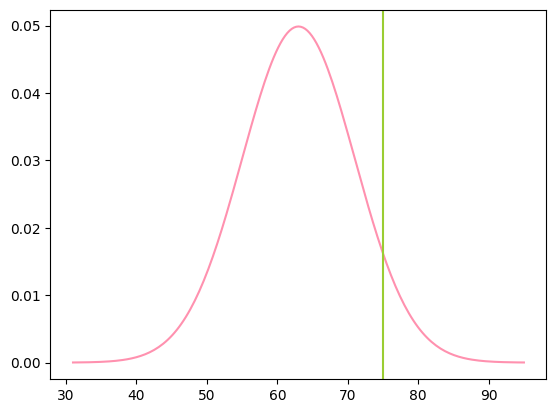

In [92]:
mu = 63    # Mean score History
sigma = 8  # Standard deviation History
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, num=201)
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y, color=bakermiller)
plt.axvline(75, color="yellowgreen"); # Show a green line for Alexandra's score for History

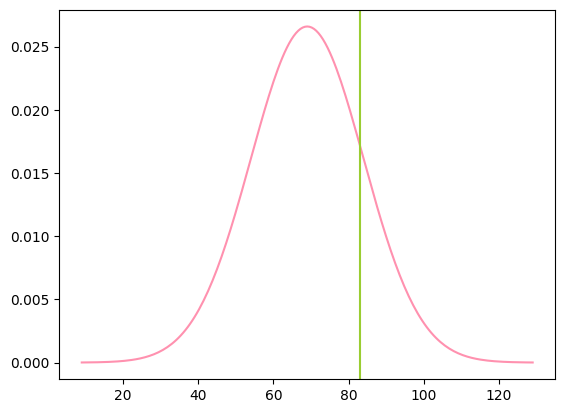

In [93]:
mu = 69    # Mean score Maths
sigma = 15  # Standard deviation Maths
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, num=201)
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y, color=bakermiller)
plt.axvline(83, color="yellowgreen") # Show a green line for Alexandra's score for Maths

There is reason to say that Alexandra's performance is better in History than in Maths. The normal distribution is written As $X \sim Nor(\mu , \sigma)$.  
This means '$X$ is distributed as a normal random variable with mean $\mu$ and standard deviation $\sigma$'.  
Since all normal distribution are the same basic shape, we only need to have probabilities for one particular case to allow us to calculate probabilities for all cases.

## Normal distribution $Nor(\mu,\sigma)$

All normal distributions are essentially the same shape - they may have a different centre, or be more peaked, but they can all be standardised to the $Nor(0,1)$ distribution.

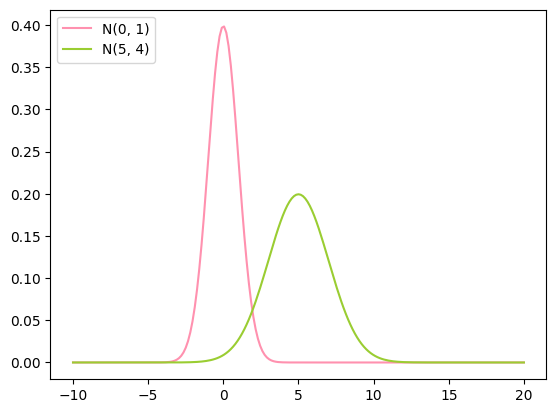

In [95]:
x = np.linspace(-10, 20, num=201)

plt.plot(x, stats.norm.pdf(x, 0, 1), label="N(0, 1)",color=bakermiller);  # Standard normal distribution
plt.plot(x, stats.norm.pdf(x, 5, 2), label="N(5, 4)", color="yellowgreen");  # N(5, 4)
plt.legend(loc="upper left");

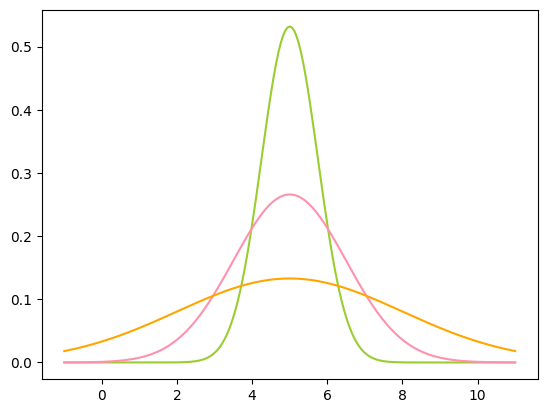

In [97]:
# Probability density of a normal distribution with different standard
# deviations
m = 5    # Mean
x = np.linspace(-1, 11, num=201)

plt.plot(x, stats.norm.pdf(x, loc=m, scale=.75), color="yellowgreen");
plt.plot(x, stats.norm.pdf(x, loc=m, scale=1.5), color=bakermiller);
plt.plot(x, stats.norm.pdf(x, loc=m, scale=3), color="orange");

The **standard normal distribution** has mean 0 and variance 1. The variable $Z$ is often used for the standard normal distribution: $Z \sim N(0,1)$  

By converting values to the standard normal distribution, you can calculate probabilities for any normal distribution. I.e. one way to compare different normal populations is to standardise the scores - by looking at their distance from the mean, then dividing by the size of the standard deviation.


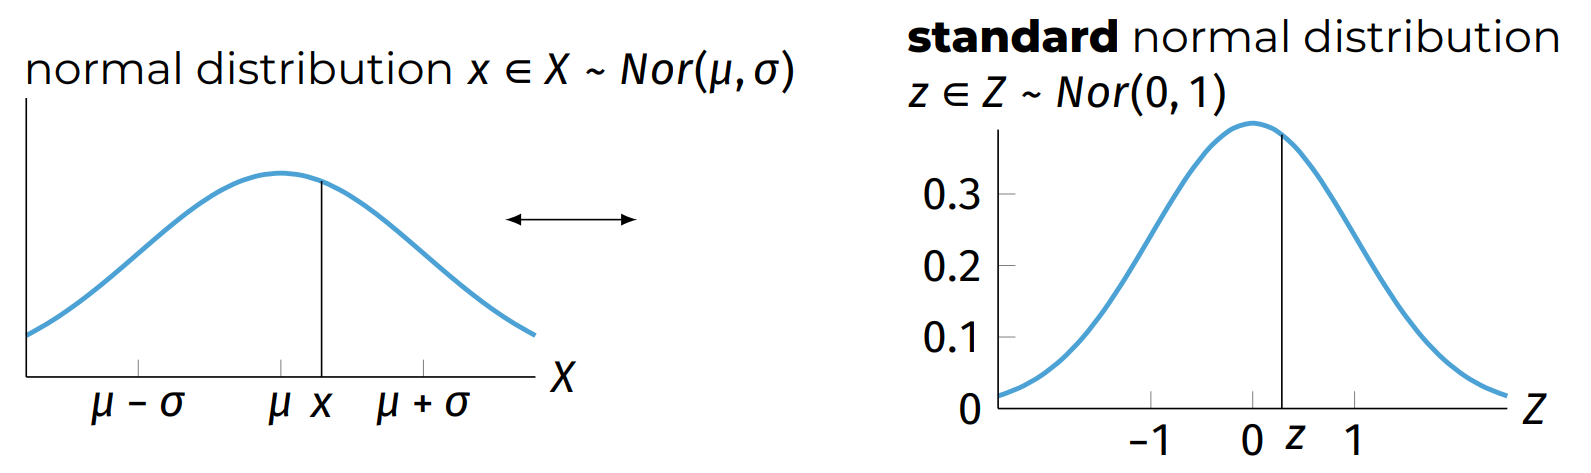

To find the **standardised score**, $z$, from a raw score, $x$, use the conversion $x = \mu + z . \sigma$  and $z = \frac{x - \mu}{\sigma}$ where $\mu$ is the mean and $\sigma$ is the standard deviation of the raw scores. The standardised score is often called the **$z$**-score.


Text(0.5, 1.0, 'Standard Normal Distribution')

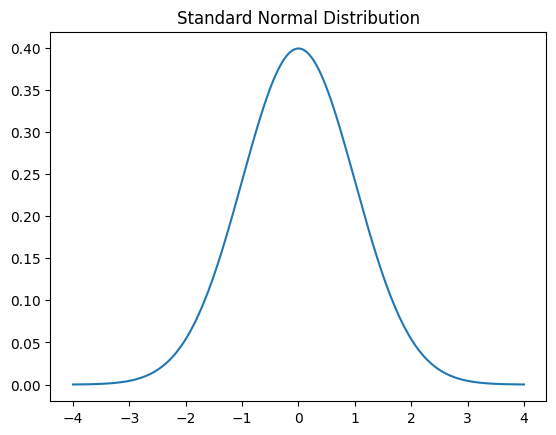

In [107]:
mu = 0    # Mean
sigma = 1  # Standard deviation
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, num=201)
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y)
plt.title("Standard Normal Distribution")

### Exercise

If $Z \sim Nor(0, 1)$ find

1. $P(Z < 1.62)$
2. $P(Z > 0.76)$
3. $P(Z < -1.32)$
4. $P(-1.2 < Z < 1.7)$

`import scipy.stats`
|Function|Purpose|
|-|-|
|`norm.pdf(c, loc=m, scale=s`|Probability density at `x`|
|`norm.cdf(x, loc=m, scale=s)`|Left-tail probability $\mathcal P(X<x)$|
|`norm.sf(x, loc=m, scale=s)`|Right-tail probability $\mathcal P(X>x)$|
|`norm.isf(1-p, loc=m, sclale=s)`|$p\%$ of observations are expected to be lower than result|

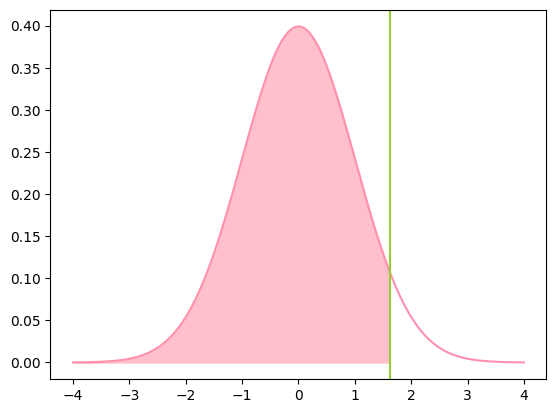

In [116]:
mu = 0    # Mean
sigma = 1  # Standard deviation
x = 1.62
dist_x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, num=201)
dist_y = stats.norm.pdf(dist_x, mu, sigma)
plt.plot(dist_x, dist_y, color=bakermiller)
# Fill the area left of x
plt.fill_between(dist_x, 0, dist_y, where=dist_x <= x, color="pink")
plt.axvline(x, color="yellowgreen")

In [129]:
print("1. P(Z < 1.62) ~= %.4f" % stats.norm.cdf(1.62, loc=0, scale=1))
print(f"2. P(Z > 0.76) ~= {stats.norm.sf(0.76, loc=0, scale=1):.4f}")
print(f"P(Z < -1.32) ~= {stats.norm.cdf(-1.32):.4f}")
print(f"P(-1.2 < Z < 1.7) ~= {stats.norm.cdf(1.7) - stats.norm.cdf(-1.2):.4f}")


1. P(Z < 1.62) ~= 0.9474
2. P(Z > 0.76) ~= 0.2236
P(Z < -1.32) ~= 0.0934
P(-1.2 < Z < 1.7) ~= 0.8404


### Exercise

The reaction speed 𝑥 of Superman (in ms) can be represented as $X \sim Nor(5, 1.5)$

1. What is the probability that Superman reacts in less than 4 ms?
   


In [132]:
print(f"P(X < 4) ~= {(stats.norm.cdf(4, loc=5, scale=1.5))*100:.2f}%")


P(X < 4) ~= 25.25%


2. What is the probability that he reacts in less than 7 ms?
   


In [133]:
print(f"P(X < 7) ~= {(stats.norm.cdf(7, loc=5, scale=1.5))*100:.2f}%")


P(X < 7) ~= 90.88%


3. What is the probability that he reacts in less than 3 ms?
   


In [134]:
print(f"P(X < 3) ~= {(stats.norm.cdf(3, loc=5, scale=1.5))*100:.2f}%")


P(X < 3) ~= 9.12%


4. What is the probability that he reacts between 2 en 6.5 ms?
   


In [135]:
print(f"P(2 < X < 6.5) ~= {(stats.norm.cdf(6.5, loc=5, scale=1.5) - stats.norm.cdf(2, loc=5, scale=1.5))*100:.2f}%")


P(2 < X < 6.5) ~= 81.86%


5. What interval contains 80% of his reaction speed?

In [148]:
print(f"80% of speed is contained int interfal [{stats.norm.ppf(0.10, loc=5, scale=1.5):.4f}, {stats.norm.ppf(0.90, loc=5, scale=1.5):.4f}]")

80% of speed is contained int interfal [3.0777, 6.9223]


In [150]:
# proof
print(f"P(stats.norm.ppf(0.10, loc=5, scale=1.5) < X < stats.norm.ppf(0.90, loc=5, scale=1.5)) ~= {(stats.norm.cdf(stats.norm.ppf(0.90, loc=5, scale=1.5), loc=5, scale=1.5) - stats.norm.cdf(stats.norm.ppf(0.10, loc=5, scale=1.5), loc=5, scale=1.5))*100:.2f}%")


P(stats.norm.ppf(0.10, loc=5, scale=1.5) < X < stats.norm.ppf(0.90, loc=5, scale=1.5)) ~= 80.00%


### Exercise 

The lengths of steel girders produced in a factory are nomally distributed with a mean length of 12.5 m and a variance of 0.0004 m². Girders need to be between 12.47 and 12.53 metres to be used in construction.

1. Find the proportion of girders which cannot be used for construction. Girders are extremely expensive to produce, and the company is not happy with this level of wastage. A new machine is installed which reduces the variance of the production to 0.0002 m² while maintaining a normal distribution with the same mean as before.
2. Find the proportion of girders produced by the new machine which cannot be used for construction.

In [167]:
mean = 12.5
variance = 0.04
lower = 12.47
upper = 12.53
new_variance = 0.0002
print("proportion of girders which cannot be used: 1 - P(12.47 < X < 12.53)")
unusable = 1 - (stats.norm.cdf(12.53, loc=mean, scale=variance) - stats.norm.cdf(12.47, loc=mean, scale=variance))
print(unusable)

print("proportion after installing new machine")
new_unusable = 1 - (stats.norm.cdf(12.53, loc=mean, scale=new_variance) - stats.norm.cdf(12.47, loc=mean, scale=new_variance))
print(new_unusable)



proportion of girders which cannot be used: 1 - P(12.47 < X < 12.53)
0.45325470475374585
proportion after installing new machine
0.0


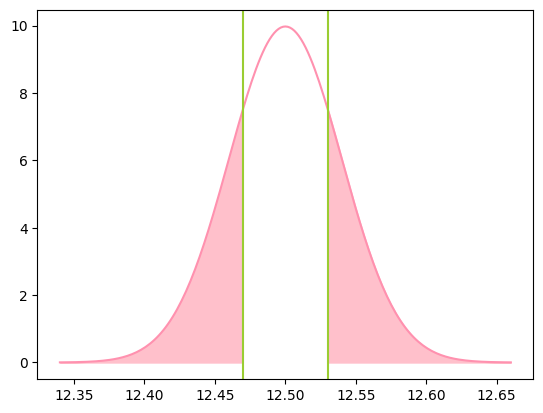

In [179]:
mu = 12.5    # Mean
sigma = 0.04  # Standard deviation
x = 12.47
z = 12.53
dist_z = np.linspace(mu - 4 * sigma, mu + 4 * sigma, num=201)
dist_x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, num=201)
dist_y = stats.norm.pdf(dist_x, mu, sigma)
plt.plot(dist_x, dist_y, color=bakermiller)
# Fill the area left of x
plt.fill_between(dist_x, 0, dist_y, where=dist_x <= x, color="pink")
plt.fill_between(dist_x, 0, dist_y, where=dist_z >= z, color="pink")

plt.axvline(x, color="yellowgreen")
plt.axvline(z, color="yellowgreen")

### Exercise

In an examination the marks are normally distributed with mean 60.7 and a standard deviation of 12.3.

1. A candidate needs a mark of 40 to pass. Approximately what percentage of candidates fail?
2. The board awards distinctions to the best 10% of the candidates. What is the least mark a candidate will to get a distinction?

0.04619462854530067
76.46308425619858


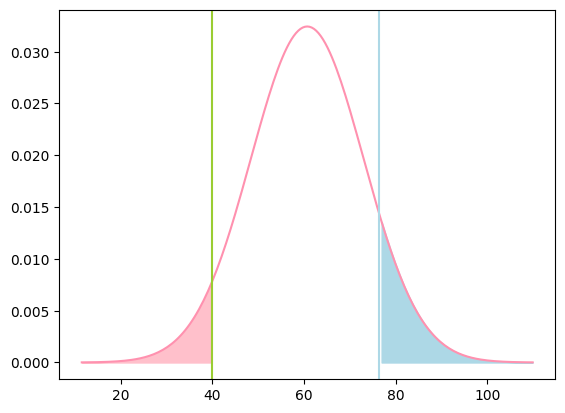

In [196]:
mu = 60.7    # Mean
sigma = 12.3  # Standard deviation
x = 40
z = stats.norm.ppf(0.9, loc=mu, scale=sigma)
dist_z = np.linspace(mu - 4 * sigma, mu + 4 * sigma, num=201)
dist_x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, num=201)
dist_y = stats.norm.pdf(dist_x, mu, sigma)
plt.plot(dist_x, dist_y, color=bakermiller)
# Fill the area left of x
plt.fill_between(dist_x, 0, dist_y, where=dist_x <= x, color="pink")
plt.fill_between(dist_x, 0, dist_y, where=dist_z >= z, color="lightblue")


plt.axvline(x, color="yellowgreen")
plt.axvline(z, color="lightblue")

# P(X < 40)
print(stats.norm.cdf(40, loc=mu, scale=sigma))

# P(X > x) = 10% => x = ?
print(stats.norm.ppf(0.9, loc=mu, scale=sigma))


### Exercise

A machine pours melted chocolate into molds. The standard deviation of the amount is pours is 0.7 grams, and the mean amount can be set on the machine.
The amount poured may be assumed to follow a normal distribution.  
The machine is to produce bars whose labels says 50g of chocolate.  
The company's lawyers want to have no more than 0.5% of bars containing less than the advertised weight.  
What should the mean be set at?

In [ ]:
std_dev = 0.7
target_mean = 50
target_prob = 0.005

# Find the z-score for 0.5% in the lower tail
z = stats.norm.ppf(target_prob)

# Solve for the mean
mean = target_mean - z * std_dev

print(f"The machine should be set to a mean of approximately {mean:.2f} grams.")

The machine should be set to a mean of approximately 51.80 grams.


### Histogram with theoretical probability density

The next example shows how to plot a histogram of normally distributed data, with the theoretical probability density function superimposed as a line graph.

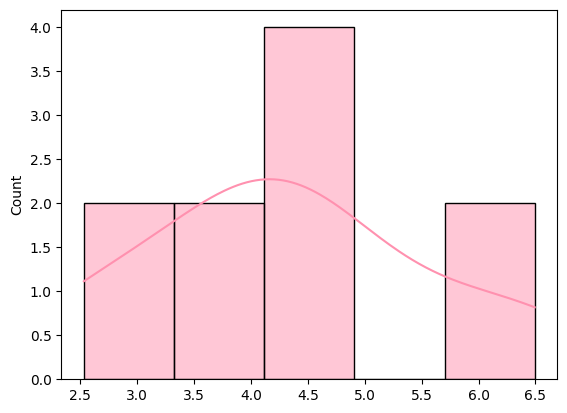

In [205]:
# Generate n random numbers, following a normal distribution
m = 5    # Mean
s = 1.5  # Standard deviation

# Increase the value for n and see how the histogram changes!
n = 10
observations = np.random.normal(loc=m, scale=s, size=n)

# Plot histogram, without probability density
obs_hist = sns.histplot(observations, kde=True, color=bakermiller)

If you plot a Gauss curve on the histogram above, you won't see much (try this for yourself!). After all, the scale on the y-axis for the Gauss curve is much smaller than that of the histogram (see the plot of a normal distribution above). The maximum value of a density function is always a number between 0 and 1 (since the area under the curve must be equal to 1), while a histogram counts how many times each observation occurs and consequently is usually larger than 1.

The solution is to draw a histogram showing *densities*. In this case, the *area* of a member is equal to the *relative* frequency of that class. (The *density* or *density* is the *relative* frequency divided by the *width* of the class.) The sum of all areas of all bars is one. This corresponds to the area under the Gauss curve which is also equal to one. The histogram and the Gauss curve can then use the same y-axis.

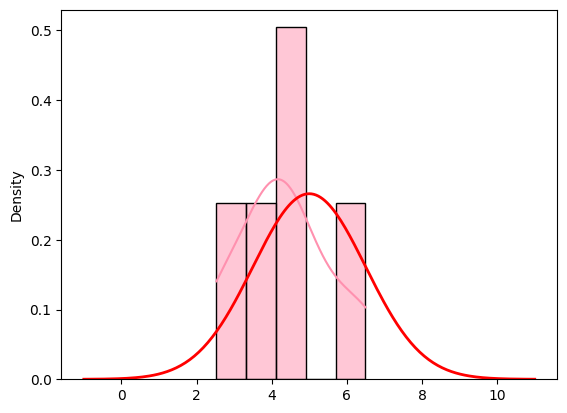

In [214]:
# histogram with observations
obs_hist = sns.histplot(observations, stat = "density", kde=True, color=bakermiller)

# X-axis values
dist_x = np.linspace(m - 4 * s, m + 4 * s, num=201)
# Probability density for the X-values
dist_y = stats.norm.pdf(dist_x, m, s)

# Plot the Gauss curve superimposed on the histogram
obs_hist.plot(dist_x, dist_y, 'red', lw=2)

## Exponential Distribution

Besides the Normal Distribution, there are other often used continuous distributions, e.g. the Exponentional Distribution. Values for an exponential random variable occur when there are fewer large values and more small values. For example, the amount of money customers spend in a trip to the supermarket follows an exponential distribution. There are more people who spend small amounts of money and fewer people who spend large amounts of money. 

Another example is the length, in minutes, of long distance business telephone calls or the amount of time (in minutes) a postal clerk spends with his or her customers. In the image below, the time is known to have an exponential distribution with an average amount of time equal to four minutes.

(0.0, 0.4)

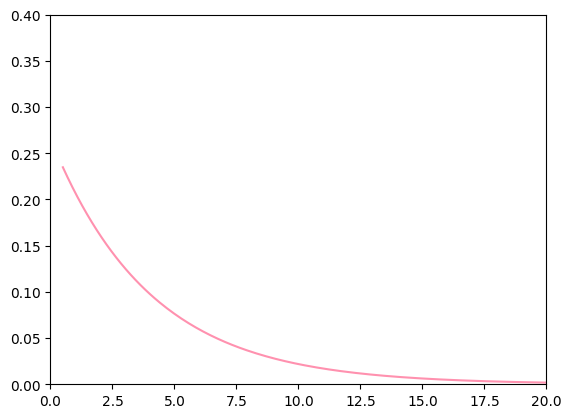

In [216]:
f, ax = plt.subplots(1, 1)

dist_x = np.linspace(0.5, 20, num=201)
dist_y = stats.expon.pdf(dist_x, loc = 0.25, scale = 4)
plt.plot(dist_x, dist_y, color=bakermiller)

plt.xlim((0,20))
plt.ylim((0,0.4))

## Continuous Uniform Distribution

The continuous Uniform Distribution describes an experiment where there is an arbitrary outcome that lies between certain bounds. It is the simplest of all continuous probability distributions. The density function is constant where every value has an equal chance of occurring.

Imagine you live in a building that has an elevator that will take you to your floor. From experience, once you push the button to call the elevator, it takes between ten and twenty seconds to arrive at your floor. This means the elevator arrival time is uniformly distributed between 10 and 20 seconds once you hit the button

(0.0, 0.2)

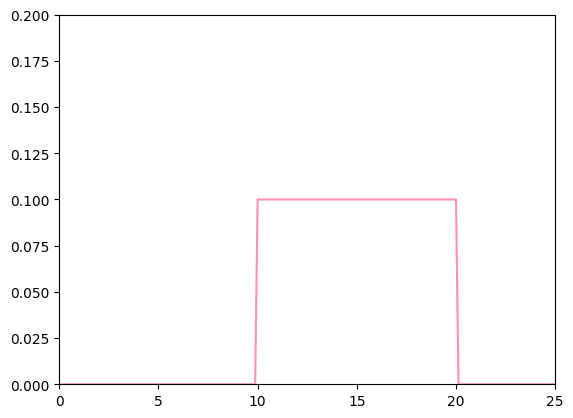

In [218]:
f, ax = plt.subplots(1, 1)

dist_x = np.linspace(0, 25, num=201)
dist_y = stats.uniform.pdf(dist_x, loc=10, scale=10)
plt.plot(dist_x, dist_y, color=bakermiller)

plt.xlim((0,25))
plt.ylim((0,0.2))

The total area under the probability density function is
always equal to 1.  
So it holds that that $P(10 \leq  X  \leq 20) = 1$  

$P(13 < X < 18)$ = area under $f_X(x)$ between13 and 18 = $5$ x $0.1$ = $0.5$

Note:  
$P(13 < X < 18) = P(13 < X \leq 18) = P(13 \leq X < 18) = P(13 \leq X \leq 18)$


**Source**  
Complete Probability & Statistics 1 & 2 for Cambridge International AS & A Level